In [3]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(
    np.arange(9).reshape((3, 3)),
    index = [
        ["a", "a", "b"],
        [1, 2, 2]
    ],
    columns = [
        ["Osaka", "Tokyo", "Osaka"],
        ["Blue", "Red", "Red"]
    ]
)
print(df)
print(df.stack())
print(df.stack().unstack())

    Osaka Tokyo Osaka
     Blue   Red   Red
a 1     0     1     2
  2     3     4     5
b 2     6     7     8
          Osaka  Tokyo
a 1 Blue      0    NaN
    Red       2    1.0
  2 Blue      3    NaN
    Red       5    4.0
b 2 Blue      6    NaN
    Red       8    7.0
    Osaka     Tokyo     
     Blue Red  Blue  Red
a 1     0   2   NaN  1.0
  2     3   5   NaN  4.0
b 2     6   8   NaN  7.0


C:\Users\utaka\AppData\Local\Temp\ipykernel_17460\1161229033.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  print(df.stack())
C:\Users\utaka\AppData\Local\Temp\ipykernel_17460\1161229033.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  print(df.stack().unstack())


In [7]:
data = pd.DataFrame({
    "col1":[1, 1, 2, 3, 4, 4, 6, 6],
    "col2":["a", "b", "b", "b", "c", "c", "b", "b"]
})
print(data)
print()
print(data.duplicated())
print()
print(data.drop_duplicates())

   col1 col2
0     1    a
1     1    b
2     2    b
3     3    b
4     4    c
5     4    c
6     6    b
7     6    b

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
dtype: bool

   col1 col2
0     1    a
1     1    b
2     2    b
3     3    b
4     4    c
6     6    b


In [8]:
data = {
    "id": ["100", "101", "102", "103", "104", "106", "108", "110", "111", "113"],
    "city": ["Tokyo", "Osaka", "Kyoto", "Hokkaido", "Tokyo", "Tokyo", "Osaka", "Kyoto", "Hokkaido", "Tokyo"],
    "birth_year": [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    "name": ["Hiroshi", "Akiko", "Yuki", "Satoru", "Steeve", "Mituru", "Aoi", "Tarou", "Suguru", "Mitsuo"]
}
df = pd.DataFrame(data)
print(df)

city_map = {
    "Tokyo":"Kanto",
    "Hokkaido":"Hokkaido",
    "Osaka":"Kansai",
    "Kyoto":"Kansai"
}
print(city_map)
df["region"] = df["city"].map(city_map)
print(df)
print()
df["up_two_num"] = df["birth_year"].map(lambda x: str(x)[0:3])
print(df)

    id      city  birth_year     name
0  100     Tokyo        1990  Hiroshi
1  101     Osaka        1989    Akiko
2  102     Kyoto        1992     Yuki
3  103  Hokkaido        1997   Satoru
4  104     Tokyo        1982   Steeve
5  106     Tokyo        1991   Mituru
6  108     Osaka        1988      Aoi
7  110     Kyoto        1990    Tarou
8  111  Hokkaido        1995   Suguru
9  113     Tokyo        1981   Mitsuo
{'Tokyo': 'Kanto', 'Hokkaido': 'Hokkaido', 'Osaka': 'Kansai', 'Kyoto': 'Kansai'}
    id      city  birth_year     name    region
0  100     Tokyo        1990  Hiroshi     Kanto
1  101     Osaka        1989    Akiko    Kansai
2  102     Kyoto        1992     Yuki    Kansai
3  103  Hokkaido        1997   Satoru  Hokkaido
4  104     Tokyo        1982   Steeve     Kanto
5  106     Tokyo        1991   Mituru     Kanto
6  108     Osaka        1988      Aoi    Kansai
7  110     Kyoto        1990    Tarou    Kansai
8  111  Hokkaido        1995   Suguru  Hokkaido
9  113     Tokyo     

In [10]:
bins = [1980, 1985, 1990, 1995, 2000]
cut_data = pd.cut(df.birth_year, bins)
print(cut_data)
pd.Series(cut_data).value_counts()

0    (1985, 1990]
1    (1985, 1990]
2    (1990, 1995]
3    (1995, 2000]
4    (1980, 1985]
5    (1990, 1995]
6    (1985, 1990]
7    (1985, 1990]
8    (1990, 1995]
9    (1980, 1985]
Name: birth_year, dtype: category
Categories (4, interval[int64, right]): [(1980, 1985] < (1985, 1990] < (1990, 1995] < (1995, 2000]]


birth_year
(1985, 1990]    4
(1990, 1995]    3
(1980, 1985]    2
(1995, 2000]    1
Name: count, dtype: int64

In [13]:
group_names = ["early1980s", "late1980s", "early1990s", "late1990s"]
cut_data = pd.cut(df.birth_year, bins, labels=group_names)
print(cut_data)
print(pd.Series(cut_data).value_counts())
print( pd.cut(df.birth_year, 2) )
print( pd.qcut(df.birth_year, 2) )
print(pd.Series(pd.qcut(df.birth_year, 2) ).value_counts())

0     late1980s
1     late1980s
2    early1990s
3     late1990s
4    early1980s
5    early1990s
6     late1980s
7     late1980s
8    early1990s
9    early1980s
Name: birth_year, dtype: category
Categories (4, object): ['early1980s' < 'late1980s' < 'early1990s' < 'late1990s']
birth_year
late1980s     4
early1990s    3
early1980s    2
late1990s     1
Name: count, dtype: int64
0      (1989.0, 1997.0]
1    (1980.984, 1989.0]
2      (1989.0, 1997.0]
3      (1989.0, 1997.0]
4    (1980.984, 1989.0]
5      (1989.0, 1997.0]
6    (1980.984, 1989.0]
7      (1989.0, 1997.0]
8      (1989.0, 1997.0]
9    (1980.984, 1989.0]
Name: birth_year, dtype: category
Categories (2, interval[float64, right]): [(1980.984, 1989.0] < (1989.0, 1997.0]]
0    (1980.999, 1990.0]
1    (1980.999, 1990.0]
2      (1990.0, 1997.0]
3      (1990.0, 1997.0]
4    (1980.999, 1990.0]
5      (1990.0, 1997.0]
6    (1980.999, 1990.0]
7    (1980.999, 1990.0]
8      (1990.0, 1997.0]
9    (1980.999, 1990.0]
Name: birth_year, dtype: ca

In [15]:
student_data_math = pd.read_csv("chap3/student-mat.csv", sep=";")
print(student_data_math.head())
# 練習問題6-7
student_data_math["age2"] = student_data_math["age"].map(lambda x: 2*x) 
print(student_data_math.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [17]:
# 練習問題6-8
bins = [0, 1, 5, 100]
print( pd.cut(student_data_math.absences, bins, right=False) )
cut_data = pd.cut(student_data_math.absences, bins, right=False)
print( pd.Series(cut_data).value_counts() )

0      [5, 100)
1        [1, 5)
2      [5, 100)
3        [1, 5)
4        [1, 5)
         ...   
390    [5, 100)
391      [1, 5)
392      [1, 5)
393      [0, 1)
394    [5, 100)
Name: absences, Length: 395, dtype: category
Categories (3, interval[int64, left]): [[0, 1) < [1, 5) < [5, 100)]
absences
[5, 100)    151
[1, 5)      129
[0, 1)      115
Name: count, dtype: int64


In [19]:
# 練習問題6-9
cut_data2 = pd.qcut(student_data_math.absences, 3)
print( pd.Series(cut_data2).value_counts() )

absences
(-0.001, 2.0]    183
(6.0, 75.0]      115
(2.0, 6.0]        97
Name: count, dtype: int64


In [21]:
print(df)

    id      city  birth_year     name    region up_two_num
0  100     Tokyo        1990  Hiroshi     Kanto        199
1  101     Osaka        1989    Akiko    Kansai        198
2  102     Kyoto        1992     Yuki    Kansai        199
3  103  Hokkaido        1997   Satoru  Hokkaido        199
4  104     Tokyo        1982   Steeve     Kanto        198
5  106     Tokyo        1991   Mituru     Kanto        199
6  108     Osaka        1988      Aoi    Kansai        198
7  110     Kyoto        1990    Tarou    Kansai        199
8  111  Hokkaido        1995   Suguru  Hokkaido        199
9  113     Tokyo        1981   Mitsuo     Kanto        198


In [23]:
print(df.groupby("city").size())
print()
print(df.groupby("city")["birth_year"].mean())
print()
print(df.groupby(["region", "city"])["birth_year"].mean())
print()
print(df.groupby(["region", "city"], as_index=False)["birth_year"].mean())

city
Hokkaido    2
Kyoto       2
Osaka       2
Tokyo       4
dtype: int64

city
Hokkaido    1996.0
Kyoto       1991.0
Osaka       1988.5
Tokyo       1986.0
Name: birth_year, dtype: float64

region    city    
Hokkaido  Hokkaido    1996.0
Kansai    Kyoto       1991.0
          Osaka       1988.5
Kanto     Tokyo       1986.0
Name: birth_year, dtype: float64

     region      city  birth_year
0  Hokkaido  Hokkaido      1996.0
1    Kansai     Kyoto      1991.0
2    Kansai     Osaka      1988.5
3     Kanto     Tokyo      1986.0


In [25]:
for group, subdf in df.groupby("region"):
    print("--------------")
    print(f"RegionName:{group}")
    print(subdf)

--------------
RegionName:Hokkaido
    id      city  birth_year    name    region up_two_num
3  103  Hokkaido        1997  Satoru  Hokkaido        199
8  111  Hokkaido        1995  Suguru  Hokkaido        199
--------------
RegionName:Kansai
    id   city  birth_year   name  region up_two_num
1  101  Osaka        1989  Akiko  Kansai        198
2  102  Kyoto        1992   Yuki  Kansai        199
6  108  Osaka        1988    Aoi  Kansai        198
7  110  Kyoto        1990  Tarou  Kansai        199
--------------
RegionName:Kanto
    id   city  birth_year     name region up_two_num
0  100  Tokyo        1990  Hiroshi  Kanto        199
4  104  Tokyo        1982   Steeve  Kanto        198
5  106  Tokyo        1991   Mituru  Kanto        199
9  113  Tokyo        1981   Mitsuo  Kanto        198


In [27]:
functions = ["count", "mean", "max", "min"]
data1 = student_data_math.groupby(["sex", "address"])
data1[["age", "G1"]].agg(functions)

age                       G1                   
            count       mean max min count       mean max min
sex address                                                  
F   R          44  16.977273  19  15    44  10.295455  19   6
    U         164  16.664634  20  15   164  10.707317  18   4
M   R          44  17.113636  21  15    44  10.659091  18   3
    U         143  16.517483  22  15   143  11.405594  19   5

In [29]:
# 練習問題6-10
print( student_data_math.groupby("school")["G1"].mean() )
# 練習問題6-11
print()
print( student_data_math.groupby(["school", "sex"])[["G1", "G2", "G3"]].mean() )
# 練習問題6-12
print()
functions2 = ["max", "min"]
data2 = student_data_math.groupby(["school", "sex"])
data2[["G1", "G2", "G3"]].agg(functions2)

school
GP    10.939828
MS    10.673913
Name: G1, dtype: float64

                   G1         G2         G3
school sex                                 
GP     F    10.579235  10.398907   9.972678
       M    11.337349  11.204819  11.060241
MS     F    10.920000  10.320000   9.920000
       M    10.380952  10.047619   9.761905



G1      G2      G3    
           max min max min max min
school sex                        
GP     F    18   4  18   0  19   0
       M    19   3  19   0  20   0
MS     F    19   6  18   5  19   0
       M    15   6  16   5  16   0

In [31]:
from numpy import nan as NA

In [33]:
df = pd.DataFrame(np.random.rand(10, 4))

print(df)
df.iloc[1, 0] = NA
df.iloc[2:3, 2] = NA
df.iloc[5:,3] = NA
print(df)

          0         1         2         3
0  0.839591  0.154390  0.669208  0.690040
1  0.049893  0.140344  0.557010  0.376939
2  0.744470  0.874460  0.243134  0.660689
3  0.918366  0.867535  0.201336  0.217897
4  0.862516  0.035496  0.510115  0.801319
5  0.371085  0.978713  0.983848  0.824068
6  0.471616  0.095175  0.219440  0.095082
7  0.795825  0.040714  0.955861  0.248012
8  0.369071  0.987432  0.057052  0.063251
9  0.468988  0.379328  0.856963  0.122728
          0         1         2         3
0  0.839591  0.154390  0.669208  0.690040
1       NaN  0.140344  0.557010  0.376939
2  0.744470  0.874460       NaN  0.660689
3  0.918366  0.867535  0.201336  0.217897
4  0.862516  0.035496  0.510115  0.801319
5  0.371085  0.978713  0.983848       NaN
6  0.471616  0.095175  0.219440       NaN
7  0.795825  0.040714  0.955861       NaN
8  0.369071  0.987432  0.057052       NaN
9  0.468988  0.379328  0.856963       NaN


In [34]:
print(df.dropna())
print()

print(df[[0,1]].dropna())
print()

print(df.fillna(0))
print()

print(df.ffill())
print()

print(df.mean())
print()

df.fillna(df.mean())

          0         1         2         3
0  0.839591  0.154390  0.669208  0.690040
3  0.918366  0.867535  0.201336  0.217897
4  0.862516  0.035496  0.510115  0.801319

          0         1
0  0.839591  0.154390
2  0.744470  0.874460
3  0.918366  0.867535
4  0.862516  0.035496
5  0.371085  0.978713
6  0.471616  0.095175
7  0.795825  0.040714
8  0.369071  0.987432
9  0.468988  0.379328

          0         1         2         3
0  0.839591  0.154390  0.669208  0.690040
1  0.000000  0.140344  0.557010  0.376939
2  0.744470  0.874460  0.000000  0.660689
3  0.918366  0.867535  0.201336  0.217897
4  0.862516  0.035496  0.510115  0.801319
5  0.371085  0.978713  0.983848  0.000000
6  0.471616  0.095175  0.219440  0.000000
7  0.795825  0.040714  0.955861  0.000000
8  0.369071  0.987432  0.057052  0.000000
9  0.468988  0.379328  0.856963  0.000000

          0         1         2         3
0  0.839591  0.154390  0.669208  0.690040
1  0.839591  0.140344  0.557010  0.376939
2  0.744470  0.874460

,0,1,2,3
0,0.839591,0.154390,0.669208,0.690040
1,0.649059,0.140344,0.557010,0.376939
2,0.744470,0.874460,0.556759,0.660689
3,0.918366,0.867535,0.201336,0.217897
4,0.862516,0.035496,0.510115,0.801319
5,0.371085,0.978713,0.983848,0.549377
6,0.471616,0.095175,0.219440,0.549377
7,0.795825,0.040714,0.955861,0.549377
8,0.369071,0.987432,0.057052,0.549377
9,0.468988,0.379328,0.856963,0.549377


In [36]:
df2 = pd.DataFrame(np.random.rand(15, 6))
print(df2)
df2.iloc[2, 0] = NA
df2.iloc[5:9, 2] = NA
df2.iloc[7:10, 3] = NA
df2.iloc[10, 5] = NA
print(df2)

           0         1         2         3         4         5
0   0.979122  0.796368  0.773777  0.614287  0.951301  0.588667
1   0.321282  0.488359  0.314285  0.595773  0.217264  0.349235
2   0.666292  0.244948  0.584419  0.406944  0.262799  0.736754
3   0.551791  0.396616  0.582309  0.452275  0.898505  0.197522
4   0.031374  0.523809  0.293696  0.387219  0.640315  0.417520
5   0.259367  0.521840  0.635283  0.700377  0.528487  0.457925
6   0.478363  0.544188  0.561541  0.913185  0.657206  0.322729
7   0.334798  0.413531  0.102123  0.003466  0.700404  0.307896
8   0.686121  0.951448  0.563429  0.723353  0.764961  0.782471
9   0.183108  0.349304  0.462208  0.527215  0.028361  0.306196
10  0.709382  0.319076  0.936794  0.380277  0.743485  0.265133
11  0.168907  0.449330  0.153405  0.857685  0.684693  0.582214
12  0.126798  0.643464  0.223215  0.844748  0.433552  0.111247
13  0.507911  0.275185  0.064666  0.958898  0.870533  0.136676
14  0.351327  0.990601  0.932450  0.877238  0.067554  0

In [38]:
# 練習問題6-13
print(df2.dropna())
# 練習問題6-14
print(df2.fillna(0))
# 練習問題6-15
print()
print(df2.mean())
print()
print(df2.fillna(df2.mean()))

           0         1         2         3         4         5
0   0.979122  0.796368  0.773777  0.614287  0.951301  0.588667
1   0.321282  0.488359  0.314285  0.595773  0.217264  0.349235
3   0.551791  0.396616  0.582309  0.452275  0.898505  0.197522
4   0.031374  0.523809  0.293696  0.387219  0.640315  0.417520
11  0.168907  0.449330  0.153405  0.857685  0.684693  0.582214
12  0.126798  0.643464  0.223215  0.844748  0.433552  0.111247
13  0.507911  0.275185  0.064666  0.958898  0.870533  0.136676
14  0.351327  0.990601  0.932450  0.877238  0.067554  0.740328
           0         1         2         3         4         5
0   0.979122  0.796368  0.773777  0.614287  0.951301  0.588667
1   0.321282  0.488359  0.314285  0.595773  0.217264  0.349235
2   0.000000  0.244948  0.584419  0.406944  0.262799  0.736754
3   0.551791  0.396616  0.582309  0.452275  0.898505  0.197522
4   0.031374  0.523809  0.293696  0.387219  0.640315  0.417520
5   0.259367  0.521840  0.000000  0.700377  0.528487  0

In [69]:
import pandas_datareader.data as pdr

In [75]:
start_date = "2001/1/2"
end_date = "2016/12/30"

data = pdr.DataReader("DEXJPUS", "fred", start_date, end_date)
print(data.head())
print(data)

            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-08   115.97
            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-08   115.97
...             ...
2016-12-26      NaN
2016-12-27   117.52
2016-12-28   117.66
2016-12-29   116.32
2016-12-30   116.78

[4174 rows x 1 columns]


In [115]:
data["2016-04-01":"2016-04-30"]

,DEXJPUS
DATE,
2016-04-01,112.06
2016-04-04,111.18
2016-04-05,110.26
2016-04-06,109.63
2016-04-07,107.98
2016-04-08,108.36
2016-04-11,107.96
2016-04-12,108.54
2016-04-13,109.21


In [119]:
data.resample("ME").last().head()

,DEXJPUS
DATE,
2001-01-31,116.39
2001-02-28,117.28
2001-03-31,125.54
2001-04-30,123.57
2001-05-31,118.88


In [129]:
print(data.resample("D").last().head())
print()
print(data.resample("D").ffill().head())

            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-06      NaN

            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-06   116.19


In [135]:
print(data.shift(1).head())
ratio = data / data.shift(1)
print(ratio.head())

            DEXJPUS
DATE               
2001-01-02      NaN
2001-01-03   114.73
2001-01-04   114.26
2001-01-05   115.47
2001-01-08   116.19
             DEXJPUS
DATE                
2001-01-02       NaN
2001-01-03  0.995903
2001-01-04  1.010590
2001-01-05  1.006235
2001-01-08  0.998107


In [139]:
# 練習問題6-16
data.resample("YE").mean().head()

,DEXJPUS
DATE,
2001-12-31,121.568040
2002-12-31,125.220438
2003-12-31,115.938685
2004-12-31,108.150830
2005-12-31,110.106932


In [147]:
print(data.head())
print(data.rolling(3).mean().head())
print()
print(data.rolling(3).std().head())

            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-08   115.97
               DEXJPUS
DATE                  
2001-01-02         NaN
2001-01-03         NaN
2001-01-04  114.820000
2001-01-05  115.306667
2001-01-08  115.876667

             DEXJPUS
DATE                
2001-01-02       NaN
2001-01-03       NaN
2001-01-04  0.610000
2001-01-05  0.975312
2001-01-08  0.368963


In [153]:
# 練習問題6-17
data2 = data.rolling(20).mean().dropna()
data2.head()

,DEXJPUS
DATE,
2001-02-12,116.6910
2001-02-13,116.6920
2001-02-14,116.6070
2001-02-15,116.5015
2001-02-16,116.4130


In [181]:
# 6章総合問題
data = student_data_math.groupby(["age", "sex"])["G1"].mean()
print(data)
data2 = data.unstack()
print(data2)
print()
print(data2.dropna())

age  sex
15   F      10.052632
     M      12.250000
16   F      10.203704
     M      11.740000
17   F      11.103448
     M      10.600000
18   F      10.883721
     M      10.538462
19   F      10.642857
     M       9.700000
20   F      15.000000
     M      13.000000
21   M      10.000000
22   M       6.000000
Name: G1, dtype: float64
sex          F          M
age                      
15   10.052632  12.250000
16   10.203704  11.740000
17   11.103448  10.600000
18   10.883721  10.538462
19   10.642857   9.700000
20   15.000000  13.000000
21         NaN  10.000000
22         NaN   6.000000

sex          F          M
age                      
15   10.052632  12.250000
16   10.203704  11.740000
17   11.103448  10.600000
18   10.883721  10.538462
19   10.642857   9.700000
20   15.000000  13.000000


In [183]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'Score')

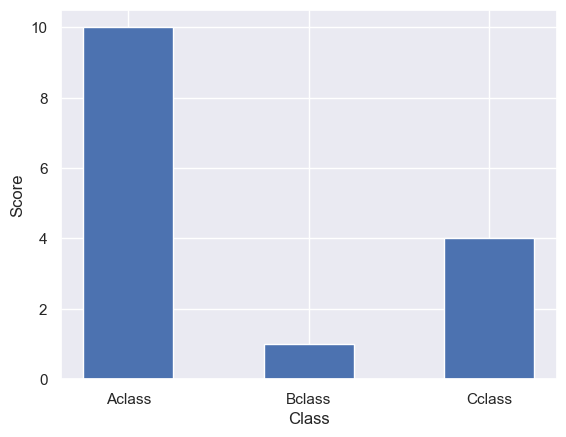

In [193]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.bar(x, y, align="center", width=0.5)
plt.xticks(x, ["Aclass", "Bclass", "Cclass"])
plt.xlabel("Class")
plt.ylabel("Score")

Text(0.5, 0, 'Score')

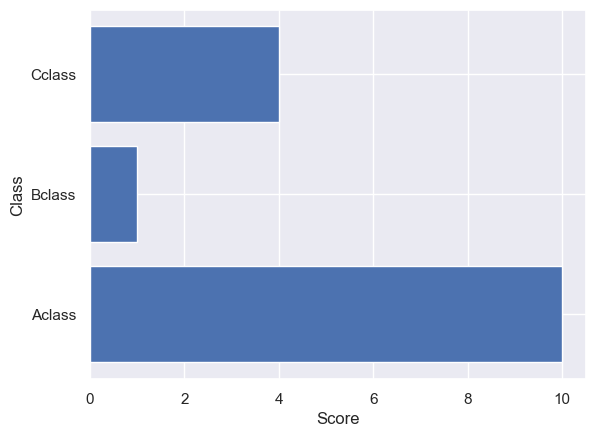

In [201]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.barh(x, y, align="center")
plt.yticks(x, ["Aclass", "Bclass", "Cclass"])
plt.ylabel("Class")
plt.xlabel("Score")

([<matplotlib.axis.XTick at 0x162eae13950>,
 [Text(0.2, 0, 'ClassA'), Text(1.2, 0, 'ClassB'), Text(2.2, 0, 'ClassC')])

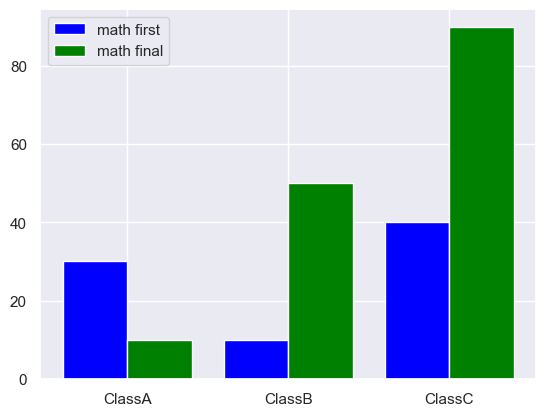

In [219]:
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

x = np.arange(len(y1))
w = 0.4

plt.bar(x, y1, color="blue", width=w, label="math first", align="center")
plt.bar(x+w, y2, color="green", width=w, label="math final", align="center")

plt.legend(loc="best")
plt.xticks(x+w/2, ["ClassA", "ClassB", "ClassC"])

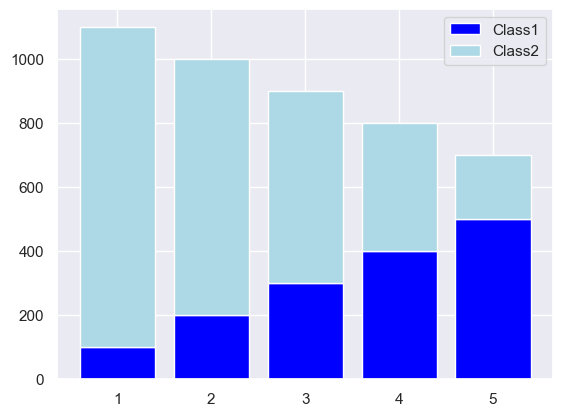

In [240]:
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

x = np.array([1, 2, 3, 4, 5])

p1 = plt.bar(x, height1, color="blue")
p2 = plt.bar(x, height2, bottom=height1, color="lightblue")

plt.legend((p1[0], p2[0]), ("Class1", "Class2"))


(-1.1998593997207163,
 1.1047438740833693,
 -1.0999843660947275,
 1.0999992555283205)

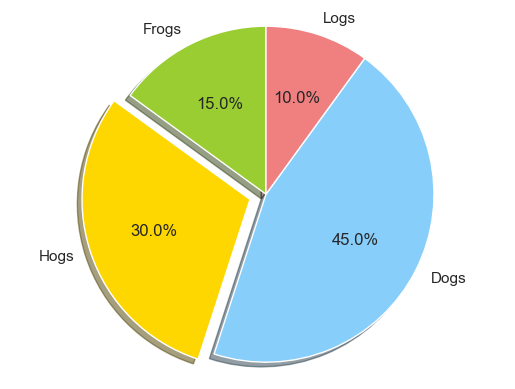

In [256]:
labels = ["Frogs", "Hogs", "Dogs", "Logs"]
sizes = [15, 30, 45, 10]
colors = ["yellowgreen", "gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

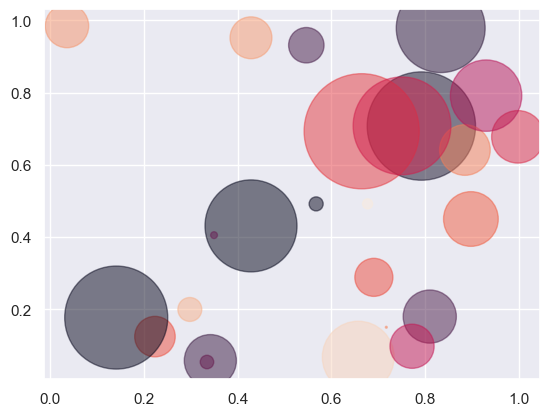

In [275]:
N = 25

x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)


In [277]:
# 練習問題7-1
print(student_data_math)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... freetime goout  Dalc  Walc  health absence